<a href="https://colab.research.google.com/github/ykjoy/mining/blob/main/classification_dt_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 간단하게 그림을 그릴 수 있는 mglearn 라이브러리 사용 (!pip install mglearn 명령어로 설치)
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 36.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=ab55205b241dae9f58e317d0e50fad0d56d117e0f3286d77aece761c295975cc
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 25.5 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
import mglearn

## 데이터 탐색    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

In [ ]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv", index_col='가입자일련번호')

print(health.columns)
display(health.info())       
display(health.head())     

Index(['기준년도', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  object 
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   신장(5Cm단위)    10000 non-null  int64  
 5   체중(5Kg 단위)   10000 non-null  int64  
 6   허리둘레         10000 non-null  float64
 7   시력(좌)        10000 non-null  float64
 8   시력(우)        10000 non-null  float64
 9   청력(좌)        10000 non-null  int64  
 10  청력(우)        10000

None

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [ ]:
health['종속비만'] = round(health['체중(5Kg 단위)'] / (health['신장(5Cm단위)'] /100)**2, 1)
health.head()

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,종속비만
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.0
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.9
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,22.9
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.3
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,20.8


In [ ]:
health['종속비만'] = health['종속비만'].apply(lambda x : 'Yes' if x >= 25 else 'No')


No     5944
Yes    4056
Name: 종속비만, dtype: int64


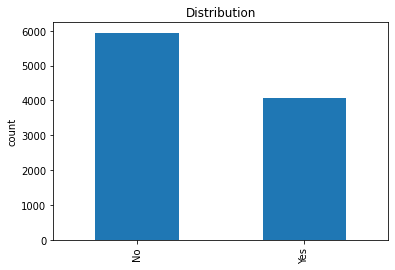

In [ ]:
print(health['종속비만'].value_counts())

health['종속비만'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution')
plt.show()

In [ ]:
health['성별코드'].replace("M", 0, inplace=True)
health['성별코드'].replace("F", 1, inplace=True)
health.head()

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,종속비만
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,0,9,165,60,72.1,1.2,1.5,1,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,No
2,2020,27,1,13,150,65,81.0,0.8,0.8,1,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,Yes
3,2020,11,1,12,155,55,70.0,0.6,0.7,1,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,No
4,2020,31,0,13,160,70,90.8,1.0,1.0,1,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,Yes
5,2020,41,1,12,155,50,75.2,1.5,1.2,1,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,No


In [ ]:
health['음주여부'].replace("No", 0, inplace=True)
health['음주여부'].replace("Yes", 1, inplace=True)
health.head()

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,종속비만
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,0,9,165,60,72.1,1.2,1.5,1,...,21.0,27.0,21.0,No,0.0,0,NaN,NaN,12/29/2021,No
2,2020,27,1,13,150,65,81.0,0.8,0.8,1,...,18.0,15.0,15.0,No,0.0,0,NaN,NaN,12/29/2021,Yes
3,2020,11,1,12,155,55,70.0,0.6,0.7,1,...,27.0,25.0,7.0,No,0.0,0,NaN,NaN,12/29/2021,No
4,2020,31,0,13,160,70,90.8,1.0,1.0,1,...,65.0,97.0,72.0,No,0.0,1,0.0,0.0,12/29/2021,Yes
5,2020,41,1,12,155,50,75.2,1.5,1.2,1,...,18.0,17.0,14.0,No,0.0,0,NaN,NaN,12/29/2021,No


In [ ]:
health['흡연상태'].replace("No", 0, inplace=True)
health['흡연상태'].replace("Yes", 1, inplace=True)
health['흡연상태'].replace("NotNow", 2, inplace=True)
health.head()

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,종속비만
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,0,9,165,60,72.1,1.2,1.5,1,...,21.0,27.0,21.0,0.0,0.0,0,NaN,NaN,12/29/2021,No
2,2020,27,1,13,150,65,81.0,0.8,0.8,1,...,18.0,15.0,15.0,0.0,0.0,0,NaN,NaN,12/29/2021,Yes
3,2020,11,1,12,155,55,70.0,0.6,0.7,1,...,27.0,25.0,7.0,0.0,0.0,0,NaN,NaN,12/29/2021,No
4,2020,31,0,13,160,70,90.8,1.0,1.0,1,...,65.0,97.0,72.0,0.0,0.0,1,0.0,0.0,12/29/2021,Yes
5,2020,41,1,12,155,50,75.2,1.5,1.2,1,...,18.0,17.0,14.0,0.0,0.0,0,NaN,NaN,12/29/2021,No


In [ ]:
health.describe()

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,9998.000000,9999.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,34.100100,0.486200,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,1.119461,0.848484,27.58979,26.789851,38.098668,0.569414,0.581958,0.325100,0.175331,0.579514
std,0.0,12.394581,0.499835,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,0.489782,0.301012,17.88442,23.735687,58.184579,0.794054,0.493262,0.468436,0.380308,0.591269
min,2020.0,11.000000,0.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,27.000000,0.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,41.000000,0.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,2020.0,44.000000,1.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,2020.0,49.000000,1.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,6.000000,9.200000,692.00000,1146.000000,2322.000000,2.000000,1.000000,1.000000,1.000000,2.000000


## 의사결정나무 (Decision tree) 모델 

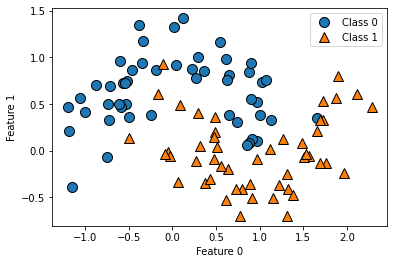

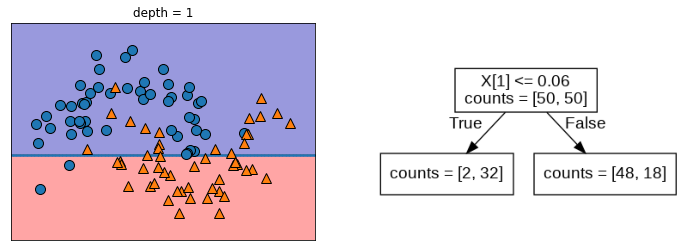

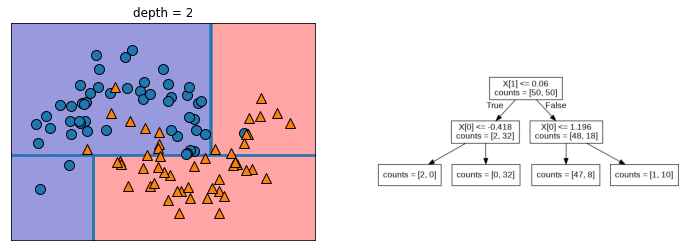

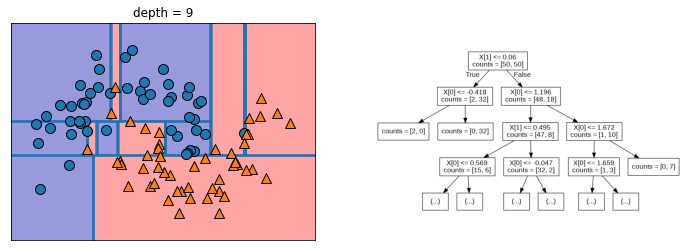

In [ ]:
# 의사결정나무 만드는 과정 
mglearn.plots.plot_tree_progressive()

### DecisionTreeClassifier

의사결정나무 모델 생성시 이용되는 주요 파라미터 
- criterion: 분할시 순수도 계산 방법 (gini, entropy, default: gini)
- splitter: 각 노드에서 분할을 선택하는 데 사용되는 전략 (best, random, default: best)
- max_depth: 나무의 최대 깊이 (default: none, 제한 없음) 
- min_samples_split: 자식 노드를 분할하는데 필요한 최소 샘플 수 (default: 2)
- min_samples_leaf: 마지막 잎 노드에 있어야 할 최소 샘플 수 (default: 1)
- max_features: 각 노드에서 분할에 사용할 변수의 최대 수 (auto, sqrt, log2, default: None)
- random_state: 난수 seed 설정 (max_features 만큼의 변수 선택시)
- max_leaf_nodes: 잎 노드의 최대수 (default: none)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Xy=health[['종속비만', '성별코드', '흡연상태', '음주여부', '연령대코드(5세단위)', '식전혈당(공복혈당)']]

In [ ]:
print(Xy.shape)
print(Xy.isnull().sum()) #결측치 확인

(10000, 6)
종속비만            0
성별코드            0
흡연상태            2
음주여부            1
연령대코드(5세단위)     0
식전혈당(공복혈당)     88
dtype: int64


In [ ]:
Xy2 = Xy.dropna(axis=0)
Xy2.shape

(9909, 6)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = Xy2.iloc[:, 1:]
print(X.head())

y = Xy2.iloc[:, 0]
#y = Xy['종속비만']
print(y.head())

         성별코드  흡연상태  음주여부  연령대코드(5세단위)  식전혈당(공복혈당)
가입자일련번호                                           
1           0   0.0   0.0            9        90.0
2           1   0.0   0.0           13        87.0
3           1   0.0   0.0           12       102.0
4           0   0.0   0.0           13       146.0
5           1   0.0   0.0           12       110.0
가입자일련번호
1     No
2    Yes
3     No
4    Yes
5     No
Name: 종속비만, dtype: object


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(max_depth =4, random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.619
시험용 데이터 정확도: 0.604


In [ ]:
# 의사결정나무의 깊이를 4로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
# 과적합(overfitting): 학습용 데이터에 대해서만 성능이 좋고 새로운 데이터에 적용했을 경우에는 성능이 좋지 않은 경우
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.619
시험용 데이터 정확도: 0.604


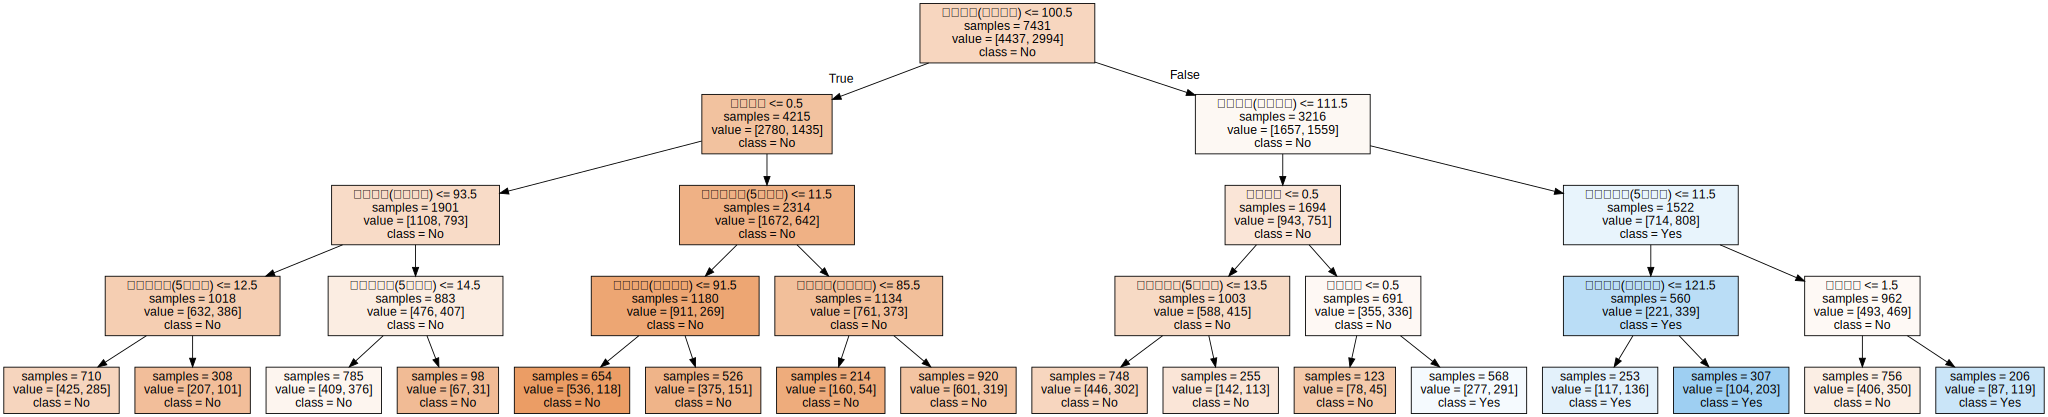

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "No", "Yes"],
                feature_names=X.columns, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

# [인사이트] 의사결정나무 Yes로 나온 4가지 경우
-식전혈당 100.5 이하가 아니고 111.5 이하인데, 흡연상태와 음주여부가 0.5 이하가 아닌 경우  
-식전혈당 100.5 이하가 아니고 111.5 이하도 아닌데, 연령대코드가 11.5 이하이고, 식전혈당이 121.5 이하거나 아니거나 둘 다의 경우  
-식전혈당 100.5 이하가 아니고 111.5 이하도 아닌데,연령대코드가 11.5 이하가 아니고, 흡연 상태도 1.5 이하가 아닌 경우

### 주요 변수들 (features)
- 의사결정나무를 생성하는데 비중이 큰 변수들을 찾을 수 있지만, feature importance가 낮다고 하여 그 변수가 중요하지 않다는 것은 아님 (이 나무에서 그 변수가 사용되지 않았을 뿐 다른 변수가 동일한 정보를 지니고 있어서일 수도 있음)  
- 의사결정나무를 생성하는데 중요도가 높다는 것은 알 수 있지만, 양성을 지지하는지 악성을 지지하는지는 알 수 없음 

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.21292008 0.04473958 0.02267282 0.15228181 0.56738572]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_

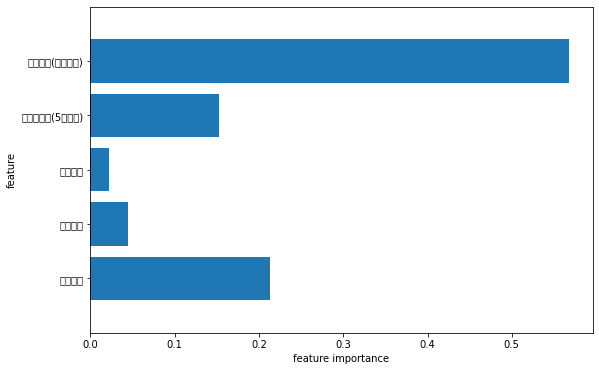

In [ ]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(X.columns)  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns)   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_health(tree)

# [인사이트] 중요도가 가장 높은 변수
-식전혈당(공복혈당)이 가장 중요도가 높다.

## 앙상블 (Ensemble) 모델


###랜덤 포레스트 (Random forest)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


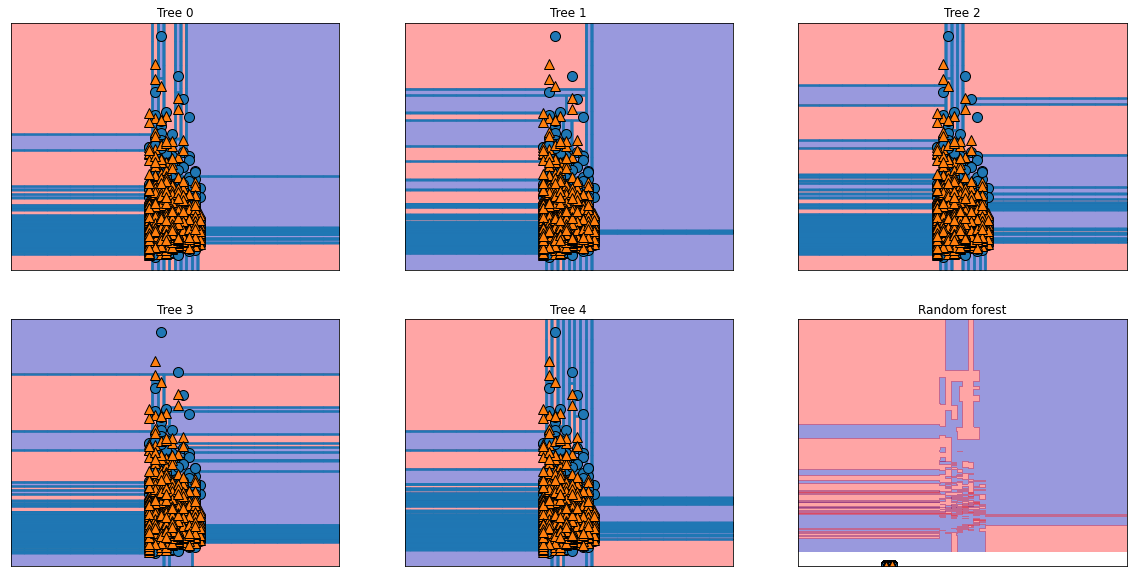

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# radius_mean, texture_mean 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:,3:], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:,3:].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:,3:].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

# [인사이트] 랜덤 포레스트 모양
-중앙에 모여있는 형태를 보인다.

In [ ]:
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.780
시험용 데이터 세트 정확도: 0.565


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_

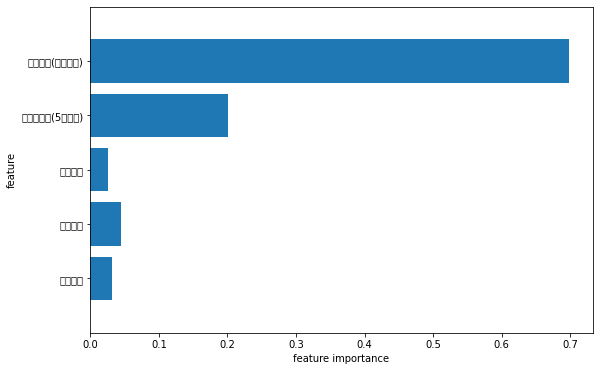

In [ ]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_health(forest)

# [인사이트] 중요도가 가장 높은 변수
-식전혈당(공복혈당)이 가장 중요도가 높다.

랜덤 포레스트와 단일 의사결정나무 비교 
- 라인 차트를 그려봄으로써 랜덤포레스트가 의사결정트리보다 매번 정확도가 높은 것을 확인할 수 있다.

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.5766129  0.58950202 0.57469717 0.57200538 0.57065949 0.57469717
 0.59757739 0.58008075 0.55450875 0.59219381]
Random forest:  [0.57392473 0.5666218  0.55316285 0.55720054 0.57738896 0.58142665
 0.59757739 0.57335128 0.55854643 0.58277254]
Accuracy mean
Decision tree :0.578
Random forest :0.572


# [인사이트] 랜덤 포레스트와 단일 의사결정나무 비교
-단일 의사결정나무의 정확도가 더 높다

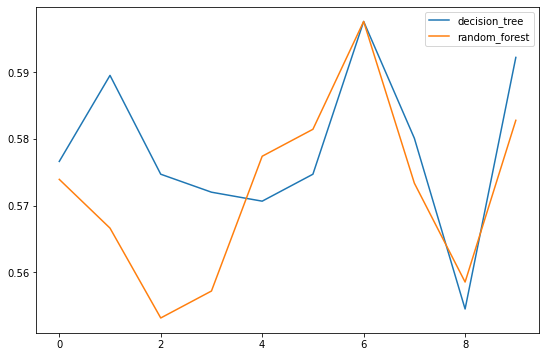

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

###그래디언트 부스팅 (Gradient Boosting)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.633
시험용 데이터 세트 정확도: 0.614


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_

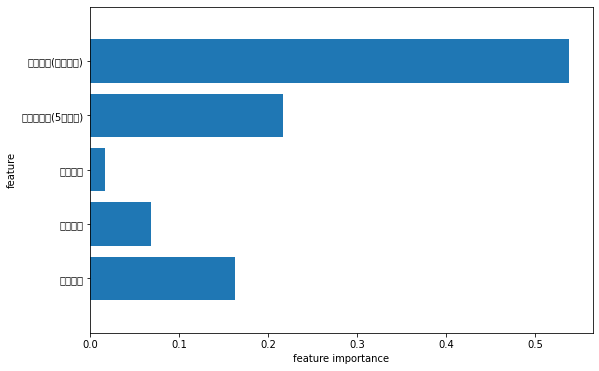

In [ ]:
plot_feature_importances_health(gbrt)

# [인사이트] 중요도가 가장 높은 변수
-식전혈당(공복혈당) 중요도가 가장 높다

- 학습용 데이터 세트의 정확도가 100%이므로 과적합임
- 과적합을 막기 위해서 나무의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있음
- 아래 예에서는 시험용 데이터 세트의 정확도가 이미 최대치라 더이상 향상되지는 않음

In [ ]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.626
시험용 데이터 세트 정확도: 0.609


In [ ]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.614
시험용 데이터 세트 정확도: 0.601


# 분류 모델 평가 (Evaluation)


## 그리드 서치 (Grid Search)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08]}

In [ ]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
#init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
#scores_df = pd.DataFrame(grid_gbrt.cv_results_)
#scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  random_state=0),
             param_grid={'learning_rate': [0.1, 0.08], 'max_depth': [1, 2, 3]})


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  random_state=0),
             param_grid={'learning_rate': [0.1, 0.08], 'max_depth': [1, 2, 3]})

In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 2}
GridSearchCV 최고 정확도: 0.6138


# [인사이트] 최적 파라미터, 최고 정확도
-최적 파라미터는 {'learning_rate': 0.1, 'max_depth': 2} 이고, 최고 정확도는 0.6138이다.

In [ ]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.609
